# Persiapan Data

    Data diambil dari apotek Sultan Farma Paguyangan

In [167]:
import pandas as pd

df = pd.read_excel('data/dataset.xlsx', parse_dates=['tanggal'], index_col='tanggal')
df

,tahun,bulan,hari,kode_obat,nama,keterangan,masuk,keluar,stok
tanggal,,,,,,,,,
2023-06-01,2023,6,1,R0527,Renadinac 50mg,Penjualan Obat Umum,0,5,1365
2023-06-01,2023,6,1,R0527,Renadinac 50mg,Penjualan Obat Umum,0,10,1355
2023-06-01,2023,6,1,R0527,Renadinac 50mg,Penjualan Obat Umum,0,40,1315
2023-06-01,2023,6,1,R0527,Renadinac 50mg,Penjualan Obat Umum,0,10,1305
2023-06-01,2023,6,1,A0437,Allopurinol 100mg,Penjualan Obat Umum,0,10,100
...,...,...,...,...,...,...,...,...,...
2024-06-24,2024,6,24,O1810,Omeprazole HJ 20mg,Penjualan Obat Umum,0,30,71
2024-06-24,2024,6,24,A093-2018,Amlodipin 10 mg HJ,Penjualan Obat Umum,0,10,235
2024-06-24,2024,6,24,R022122017-03,Rhemafar tab 4 mg,Penjualan Obat Umum,0,10,1062


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2023-06-01 to 2024-06-27
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tahun       1581 non-null   int64 
 1   bulan       1581 non-null   int64 
 2   hari        1581 non-null   int64 
 3   kode_obat   1581 non-null   object
 4   nama        1581 non-null   object
 5   keterangan  1581 non-null   object
 6   masuk       1581 non-null   int64 
 7   keluar      1581 non-null   int64 
 8   stok        1581 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 123.5+ KB


In [169]:
df.describe()

,tahun,bulan,hari,masuk,keluar,stok
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,2023.484503,6.363694,16.645794,17.134725,18.093612,559.645161
std,0.499918,3.231557,8.039288,115.407699,17.386124,397.932875
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2023.000000,4.000000,11.000000,0.000000,10.000000,221.000000
50%,2023.000000,6.000000,17.000000,0.000000,10.000000,490.000000
75%,2024.000000,9.000000,23.000000,0.000000,20.000000,820.000000
max,2024.000000,12.000000,31.000000,2000.000000,442.000000,2142.000000


# Preprocessing
    Data akan dipisah menjadi perobat dan di deret dalam data harian, jumlah keluar dan jumlah masuk di hari yang sama akan dijumlahkan sehingga menjadi data satu hari utuh

In [170]:
obat = {}
print(len(df))
for index, row in df.iterrows():
    if row['kode_obat'] not in obat:
        obat[row['kode_obat']] = pd.DataFrame(columns=df.columns, data=[row], index=[index])
    else:
        obat[row['kode_obat']] = obat[row['kode_obat']]._append(row)

count = 0
for idx, dt in obat.items():
    obat[idx].index = pd.to_datetime(obat[idx].index)
    obat[idx] = obat[idx].resample('D').agg({'tahun':'last','bulan':'last','hari':'last','kode_obat':'last','nama':'last', 'keterangan':'last','masuk':'sum','keluar':'sum','stok':'last'})
    count += len(obat[idx])
    obat[idx].index.name = 'tanggal'
    print(idx, len(obat[idx]))
print(count)

1581
R0527 390
A0437 389
A093-2018 393
R022122017-03 390
O1810 389
1951


In [171]:
obat['R0527']

,tahun,bulan,hari,kode_obat,nama,keterangan,masuk,keluar,stok
tanggal,,,,,,,,,
2023-06-01,2023.0,6.0,1.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,65,1305.0
2023-06-02,2023.0,6.0,2.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,60,1245.0
2023-06-03,NaN,NaN,NaN,None,None,None,0,0,NaN
2023-06-04,2023.0,6.0,4.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,40,1205.0
2023-06-05,2023.0,6.0,5.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,10,1195.0
...,...,...,...,...,...,...,...,...,...
2024-06-20,2024.0,6.0,20.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,90,670.0
2024-06-21,2024.0,6.0,21.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,20,650.0
2024-06-22,2024.0,6.0,22.0,R0527,Renadinac 50mg,Penjualan Obat Umum,0,60,590.0


## Visualisasi data

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

d:\Project\2024\07-Juli\Intan\mlrobat\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\Project\2024\07-Juli\Intan\mlrobat\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


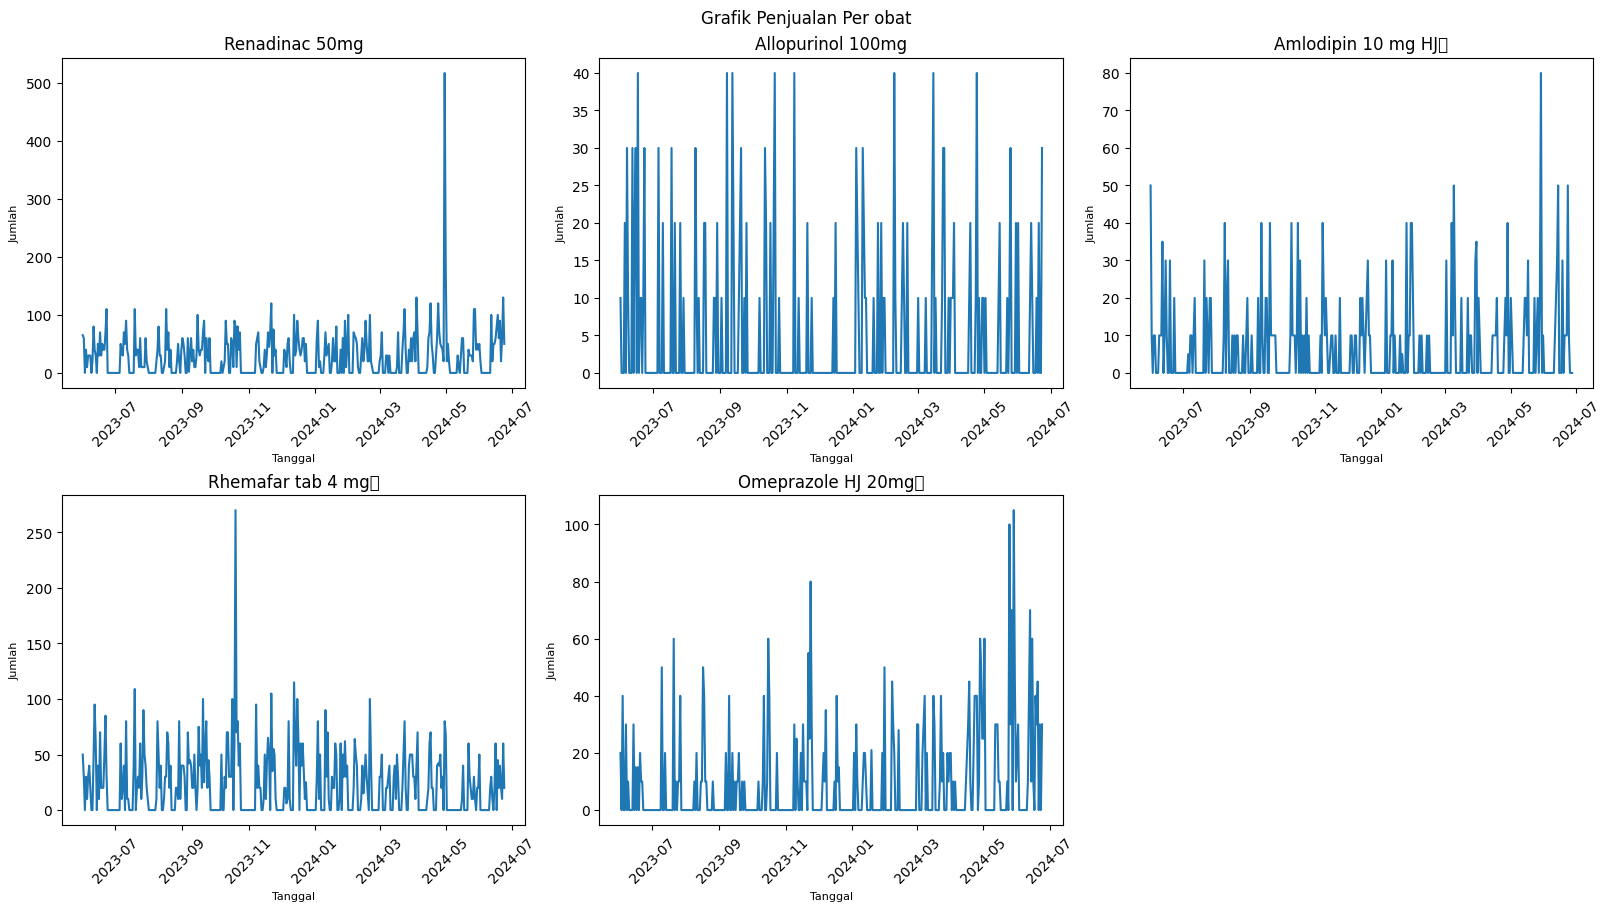

In [172]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(16,9), constrained_layout = True)
fig.suptitle('Grafik Penjualan Per obat')

ax[0, 0].plot(obat['R0527'].index, obat['R0527']['keluar'])
ax[0, 0].set_title('Renadinac 50mg')
ax[0, 0].set_xlabel('Tanggal', fontsize=8)
ax[0, 0].set_ylabel('Jumlah', fontsize=8)
ax[0, 0].tick_params('x', labelrotation=45)

ax[0, 1].plot(obat['A0437'].index, obat['A0437']['keluar'])
ax[0, 1].set_title('Allopurinol 100mg')
ax[0, 1].set_xlabel('Tanggal', fontsize=8)
ax[0, 1].set_ylabel('Jumlah', fontsize=8)
ax[0, 1].tick_params('x', labelrotation=45)

ax[0, 2].plot(obat['A093-2018'].index, obat['A093-2018']['keluar'])
ax[0, 2].set_title('Amlodipin 10 mg HJ	')
ax[0, 2].set_xlabel('Tanggal', fontsize=8)
ax[0, 2].set_ylabel('Jumlah', fontsize=8)
ax[0, 2].tick_params('x', labelrotation=45)

ax[1, 0].plot(obat['R022122017-03'].index, obat['R022122017-03']['keluar'])
ax[1, 0].set_title('Rhemafar tab 4 mg	')
ax[1, 0].set_xlabel('Tanggal', fontsize=8)
ax[1, 0].set_ylabel('Jumlah', fontsize=8)
ax[1, 0].tick_params('x', labelrotation=45)

ax[1, 1].plot(obat['O1810'].index, obat['O1810']['keluar'])
ax[1, 1].set_title('Omeprazole HJ 20mg	')
ax[1, 1].set_xlabel('Tanggal', fontsize=8)
ax[1, 1].set_ylabel('Jumlah', fontsize=8)
ax[1, 1].tick_params('x', labelrotation=45)

ax[-1, -1].axis('off')

## Mempersiapkan Variabel X dan 
    Sampel menggunakan salah satu dari 5 jenis obat

    Data akan dijadikan deret waktu selama n hari, jika n bernilai 3 maka data hari ke 1-3 akan menjadi variabel X dan hari ke 4 menjadi variabel y, begitu seterusnya

In [173]:
deret = []

n = 3

lastrow = obat['R0527'].iloc[[-1]]
for index, row in obat['R0527'].iterrows():
    if index > lastrow.index - pd.Timedelta(days=n):
        continue
    deretY = obat['R0527'].loc[index+pd.Timedelta(days=n)]['keluar']
    deretX = []
    for i in range(n):
        deretX.append(obat['R0527'].loc[index+pd.Timedelta(days=i)]['keluar'])
    
    deretX.append(deretY)
    deretX.append(index + pd.Timedelta(days=n))
    deret.append(deretX)

import numpy as np
deret = np.array(deret)

deretWaktu = deret[:, -1]
X = deret[:, :-2]
y = deret[:, -2]

print(X)
print(y)
print(deretWaktu)


[[np.int64(65) np.int64(60) np.int64(0)]
 [np.int64(60) np.int64(0) np.int64(40)]
 [np.int64(0) np.int64(40) np.int64(10)]
 ...
 [np.int64(60) np.int64(90) np.int64(20)]
 [np.int64(90) np.int64(20) np.int64(60)]
 [np.int64(20) np.int64(60) np.int64(130)]]
[np.int64(40) np.int64(10) np.int64(30) np.int64(30) np.int64(30)
 np.int64(0) np.int64(20) np.int64(80) np.int64(40) np.int64(30)
 np.int64(0) np.int64(50) np.int64(30) np.int64(70) np.int64(30)
 np.int64(50) np.int64(40) np.int64(40) np.int64(70) np.int64(110)
 np.int64(0) np.int64(0) np.int64(0) np.int64(0) np.int64(0) np.int64(0)
 np.int64(0) np.int64(0) np.int64(0) np.int64(0) np.int64(0) np.int64(0)
 np.int64(50) np.int64(33) np.int64(30) np.int64(70) np.int64(50)
 np.int64(90) np.int64(40) np.int64(30) np.int64(0) np.int64(0)
 np.int64(0) np.int64(0) np.int64(0) np.int64(110) np.int64(30)
 np.int64(40) np.int64(40) np.int64(10) np.int64(60) np.int64(10)
 np.int64(10) np.int64(10) np.int64(10) np.int64(60) np.int64(20)
 np.int64

    Split data menjadi data training dan data testing

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 3) (78, 3) (309,) (78,)


# Multiple Linear Regression

    Multiple linear regression adalah ekstensi dari simple linear regression yang melibatkan lebih dari satu variabel independen. Tujuannya adalah untuk memodelkan hubungan antara satu variabel dependen dan dua atau lebih variabel independen. Ini memungkinkan analisis yang lebih komprehensif karena dapat mempertimbangkan efek dari beberapa faktor secara bersamaan terhadap variabel dependen.

    Perbedaan Antara Simple Linear Regression dan Multiple Linear Regression

1. Jumlah Variabel Independen: Simple Linear Regression Hanya satu variabel independen sedangkan Multiple Linear Regression Dua atau lebih variabel independen.
2. Kompleksitas Model: Simple Linear Regression Lebih sederhana, lebih mudah diinterpretasikan, dan biasanya digunakan ketika hanya ada satu faktor yang signifikan yang mempengaruhi variabel dependen. Sedangkan Multiple Linear Regression Lebih kompleks, dapat menangani situasi di mana beberapa faktor mempengaruhi variabel dependen secara bersamaan.
3. Aplikasi: Simple Linear Regression Cocok untuk analisis dasar dan situasi di mana hubungan antara dua variabel sudah jelas. Sedangkan Multiple Linear Regression Digunakan dalam analisis yang lebih kompleks di mana banyak variabel perlu dipertimbangkan untuk memberikan prediksi yang lebih akurat.
4. Asumsi: Simple Linear Regression menghasilkan Asumsi yang lebih sederhana, terutama asumsi linearitas antara dua variabel. Sedangkan Multiple Linear Regression Memerlukan lebih banyak asumsi, termasuk tidak adanya multikolinearitas (hubungan yang sangat tinggi antar variabel independen) dan homoskedastisitas (variasi yang sama dari error term di semua nilai variabel independen).

Persamaan Multiple Linear Regression

![alt rumus](flaskr/static/img/formula.jpg "Persamaan Multiple Linear Regression")

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(y_pred)
print(y_test)

4140.844749371295
3.3284442255606244e+16
[ 16.96839323  17.6973206   17.6973206   17.6973206   17.6973206
  17.6973206   17.6973206   20.24003998  33.86695179  40.87211334
  53.97836274  40.64176928  28.64246361  19.91660299  17.38492316
  25.32547873  35.69358165  53.37744525  45.83134051  35.55453222
  32.97720508  31.45745289  25.96742291 150.56601227 110.47638632
  33.83877881  30.36316267  27.14106905  19.00328806  17.48905564
  17.6973206   17.6973206   17.6973206   17.6973206   17.6973206
  25.32547873  22.97998477  18.29823809  25.22134625  35.69358165
  38.121129    22.5524153   17.07252571  17.6973206   17.6973206
  27.86819811  28.97873845  27.6488936   27.75302608  25.2103067
  47.18146615  55.50543301  36.76920505  32.91871991  32.01824283
  33.5435148   26.93280408  19.00328806  17.48905564  17.6973206
  17.6973206   17.6973206   17.6973206   17.6973206   17.6973206
  17.6973206   43.12451436  31.91590866  31.19622253  34.76922717
  36.9995491   42.99830279  49.80623892  

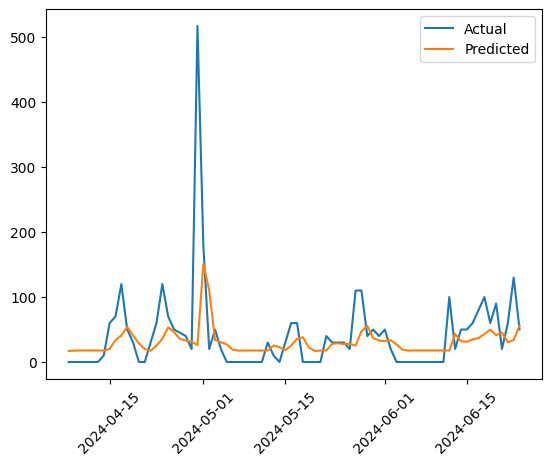

In [176]:
import matplotlib.pyplot as plt

# get last len(y_test) data
plt.plot(deretWaktu[len(deretWaktu)-len(y_test):], y_test, label='Actual')
plt.plot(deretWaktu[len(deretWaktu)-len(y_test):], y_pred, label='Predicted')
plt.xticks(rotation=45)
plt.legend()

In [177]:
mlr.score(X_test, y_test)

0.06702045981691296

# Prediksi
    Prediksi n data selanjutnya

[[np.int64(20) np.int64(60) np.int64(130)]]


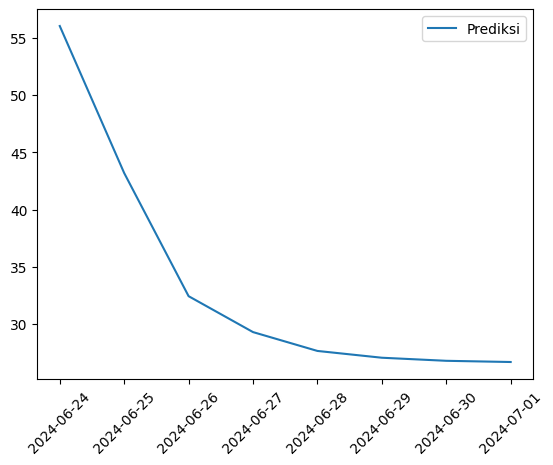

In [178]:
n = 7

lastrow = X_test[[-1]]
print(lastrow)
mlr.predict(lastrow)

z_test = []
z_pred = []
z_waktu = []
z_test.append(lastrow[0])
z_pred.append(mlr.predict(lastrow)[0])
z_waktu.append(deretWaktu[-1])
for i in range(n):
    z_waktu.append(z_waktu[-1] + pd.Timedelta(days=1))
    testVar = []
    for i in range(len(z_test[-1])):
        if i == 0:
            continue
        else:
            testVar.append(z_test[-1][i])
    testVar.append(z_pred[-1])
    z_test.append(testVar)
    predVar = mlr.predict([testVar])
    z_pred.append(predVar[0])

plt.plot(z_waktu, z_pred, label='Prediksi')
plt.xticks(rotation=45)
plt.legend()